# SExtractor analysis

In this notebook I am using the tables produced with **SExtractor** for the `fits` images without mask and with the two different masks. I analyze the number of objects found in each image and the resulted magnitudes for the objects in each image.

If you have all the necessary data, you just need to run the other notebooks first.

### Libraries

In [1]:
import os
import getpass
import splusdata
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import make_lupton_rgb
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
import scipy.ndimage
from astropy.visualization import hist
from scipy.ndimage import binary_closing
from sklearn.cluster import KMeans
from astropy.nddata import Cutout2D

### User inputs

In [3]:
field = 'STRIPE82-0113'#'HYDRA-0167'

### Getting data

In [4]:
original_R = pd.read_csv('data/'+field+'/'+field+'_R.csv')
fmask_R = pd.read_csv('results/'+field+'/fits/finding_R.csv')
smask_R = pd.read_csv('results/'+field+'/fits/segmenting_R.csv')
omask_R = pd.read_csv('results/'+field+'/fits/original_R.csv')

original_G = pd.read_csv('data/'+field+'/'+field+'_G.csv')
fmask_G = pd.read_csv('results/'+field+'/fits/finding_G.csv')
smask_G = pd.read_csv('results/'+field+'/fits/segmenting_G.csv')
omask_G = pd.read_csv('results/'+field+'/fits/original_G.csv')

original_I = pd.read_csv('data/'+field+'/'+field+'_I.csv')
fmask_I = pd.read_csv('results/'+field+'/fits/finding_I.csv')
smask_I = pd.read_csv('results/'+field+'/fits/segmenting_I.csv')
omask_I = pd.read_csv('results/'+field+'/fits/original_I.csv')

In [5]:
#Removing the not well detected objects - Band R
original_R = original_R[original_R['MAG_APER'] < 99]
fmask_R = fmask_R[fmask_R['MAG_APER'] < 99]
smask_R = smask_R[smask_R['MAG_APER'] < 99]
omask_R = omask_R[omask_R['MAG_APER'] < 99]

original_R = original_R[original_R['MAG_AUTO'] < 99]
fmask_R = fmask_R[fmask_R['MAG_AUTO'] < 99]
smask_R = smask_R[smask_R['MAG_AUTO'] < 99]
omask_R = omask_R[omask_R['MAG_AUTO'] < 99]

original_R = original_R[original_R['MAG_PETRO'] < 99]
fmask_R = fmask_R[fmask_R['MAG_PETRO'] < 99]
smask_R = smask_R[smask_R['MAG_PETRO'] < 99]
omask_R = omask_R[omask_R['MAG_PETRO'] < 99]

In [6]:
#Removing the not well detected objects - Band G
original_G = original_G[original_G['MAG_APER'] < 99]
fmask_G = fmask_G[fmask_G['MAG_APER'] < 99]
smask_G = smask_G[smask_G['MAG_APER'] < 99]
omask_G = omask_G[omask_G['MAG_APER'] < 99]

original_G = original_G[original_G['MAG_AUTO'] < 99]
fmask_G = fmask_G[fmask_G['MAG_AUTO'] < 99]
smask_G = smask_G[smask_G['MAG_AUTO'] < 99]
omask_G = omask_G[omask_G['MAG_AUTO'] < 99]

original_G = original_G[original_G['MAG_PETRO'] < 99]
fmask_G = fmask_G[fmask_G['MAG_PETRO'] < 99]
smask_G = smask_G[smask_G['MAG_PETRO'] < 99]
omask_G = omask_G[omask_G['MAG_PETRO'] < 99]

In [7]:
#Removing the not well detected objects - Band I
original_I = original_I[original_I['MAG_APER'] < 99]
fmask_I = fmask_I[fmask_I['MAG_APER'] < 99]
smask_I = smask_I[smask_I['MAG_APER'] < 99]
omask_I = omask_I[omask_I['MAG_APER'] < 99]

original_I = original_I[original_I['MAG_AUTO'] < 99]
fmask_I = fmask_I[fmask_I['MAG_AUTO'] < 99]
smask_I = smask_I[smask_I['MAG_AUTO'] < 99]
omask_I = omask_I[omask_I['MAG_AUTO'] < 99]

original_I = original_I[original_I['MAG_PETRO'] < 99]
fmask_I = fmask_I[fmask_I['MAG_PETRO'] < 99]
smask_I = smask_I[smask_I['MAG_PETRO'] < 99]
omask_I = omask_I[omask_I['MAG_PETRO'] < 99]

In [8]:
print('Field:', field, 'band R')
print('The number of objects in the original image is:', original_R.shape[0])
print('The number of objects in the image with the original mask is:', omask_R.shape[0])
print('The number of objects in the image with the finding mask is:', fmask_R.shape[0])
print('The number of objects in the image with the segmenting mask is:', smask_R.shape[0])
print(f'The percentage of the objects covered by the original mask is: {100*(1. - omask_R.shape[0]/original_R.shape[0]):.2f} %')
print(f'The percentage of the objects covered by the finding mask is: {100*(1. - fmask_R.shape[0]/original_R.shape[0]):.2f} %')
print(f'The percentage of the objects covered by the segmenting mask is: {100*(1. - smask_R.shape[0]/original_R.shape[0]):.2f} %')

Field: STRIPE82-0113 band R
The number of objects in the original image is: 38601
The number of objects in the image with the original mask is: 22254
The number of objects in the image with the finding mask is: 34153
The number of objects in the image with the segmenting mask is: 35100
The percentage of the objects covered by the original mask is: 42.35 %
The percentage of the objects covered by the finding mask is: 11.52 %
The percentage of the objects covered by the segmenting mask is: 9.07 %


In [9]:
print('Field:', field, 'band G')
print('The number of objects in the original image is:', original_G.shape[0])
print('The number of objects in the image with the original mask is:', omask_G.shape[0])
print('The number of objects in the image with the finding mask is:', fmask_G.shape[0])
print('The number of objects in the image with the segmenting mask is:', smask_G.shape[0])
print(f'The percentage of the objects covered by the original mask is: {100*(1. - omask_G.shape[0]/original_G.shape[0]):.2f} %')
print(f'The percentage of the objects covered by the finding mask is: {100*(1. - fmask_G.shape[0]/original_G.shape[0]):.2f} %')
print(f'The percentage of the objects covered by the segmenting mask is: {100*(1. - smask_G.shape[0]/original_G.shape[0]):.2f} %')

Field: STRIPE82-0113 band G
The number of objects in the original image is: 25758
The number of objects in the image with the original mask is: 14752
The number of objects in the image with the finding mask is: 22870
The number of objects in the image with the segmenting mask is: 23471
The percentage of the objects covered by the original mask is: 42.73 %
The percentage of the objects covered by the finding mask is: 11.21 %
The percentage of the objects covered by the segmenting mask is: 8.88 %


In [10]:
print('Field:', field, 'band I')
print('The number of objects in the original image is:', original_I.shape[0])
print('The number of objects in the image with the original mask is:', omask_I.shape[0])
print('The number of objects in the image with the finding mask is:', fmask_I.shape[0])
print('The number of objects in the image with the segmenting mask is:', smask_I.shape[0])
print(f'The percentage of the objects covered by the original mask is: {100*(1. - omask_I.shape[0]/original_I.shape[0]):.2f} %')
print(f'The percentage of the objects covered by the finding mask is: {100*(1. - fmask_I.shape[0]/original_I.shape[0]):.2f} %')
print(f'The percentage of the objects covered by the segmenting mask is: {100*(1. - smask_I.shape[0]/original_I.shape[0]):.2f} %')

Field: STRIPE82-0113 band I
The number of objects in the original image is: 48453
The number of objects in the image with the original mask is: 28063
The number of objects in the image with the finding mask is: 42928
The number of objects in the image with the segmenting mask is: 44151
The percentage of the objects covered by the original mask is: 42.08 %
The percentage of the objects covered by the finding mask is: 11.40 %
The percentage of the objects covered by the segmenting mask is: 8.88 %


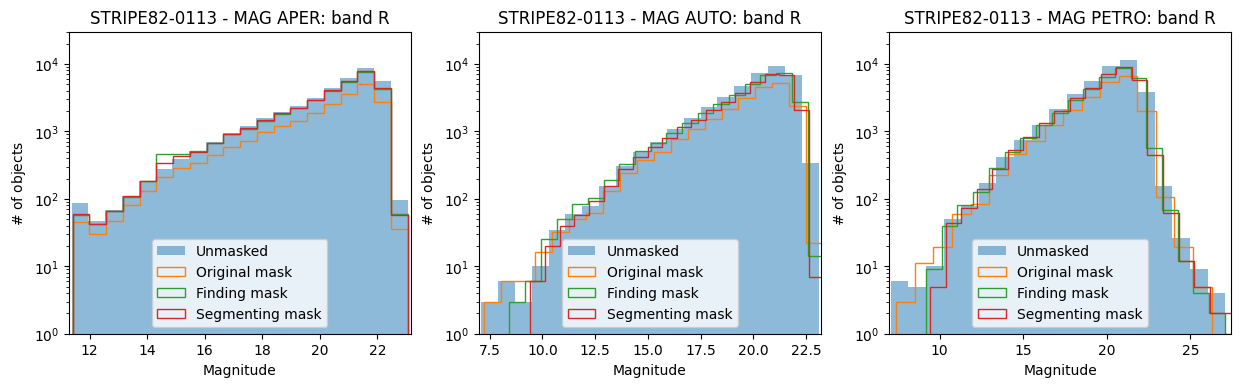

In [11]:
plt.figure(figsize = (15, 4), dpi = 100)

plt.subplot(1,3,1)
plt.title(field+' - MAG APER: band R')
plt.hist(original_R['MAG_APER'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_R['MAG_APER'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_R['MAG_APER'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_R['MAG_APER'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 3*10**4)
plt.xlim(np.min(original_R['MAG_APER']) - 0.1, np.max(original_R['MAG_APER']) + 0.1)

plt.subplot(1,3,2)
plt.title(field+' - MAG AUTO: band R')
plt.hist(original_R['MAG_AUTO'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_R['MAG_AUTO'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_R['MAG_AUTO'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_R['MAG_AUTO'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 3*10**4)
plt.xlim(np.min(original_R['MAG_AUTO']) - 0.1, np.max(original_R['MAG_AUTO']) + 0.1)

plt.subplot(1,3,3)
plt.title(field+' - MAG PETRO: band R')
plt.hist(original_R['MAG_PETRO'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_R['MAG_PETRO'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_R['MAG_PETRO'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_R['MAG_PETRO'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 3*10**4)
plt.xlim(np.min(original_R['MAG_PETRO']) - 0.1, np.max(original_R['MAG_PETRO']) - 0.7)

plt.savefig('results/'+field+'/'+field+'-magnitudes-band_R.png', bbox_inches='tight')

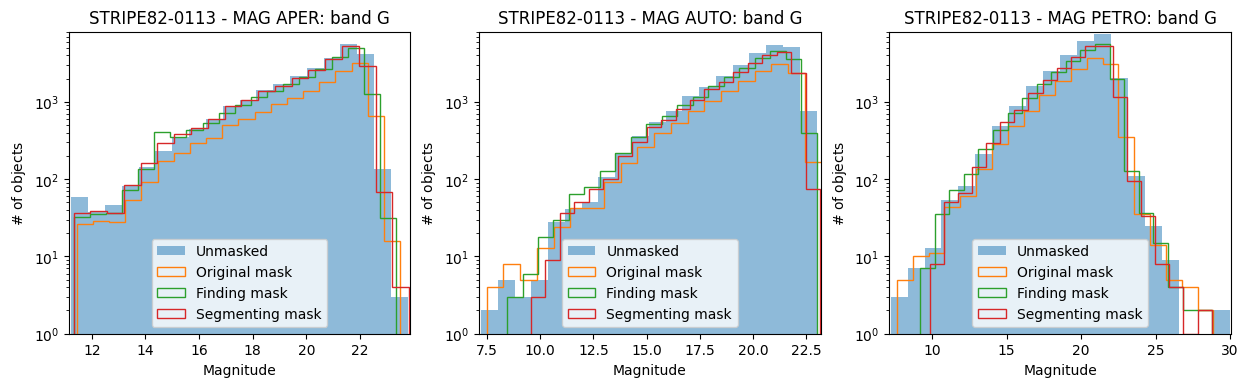

In [12]:
plt.figure(figsize = (15, 4), dpi = 100)

plt.subplot(1,3,1)
plt.title(field+' - MAG APER: band G')
plt.hist(original_G['MAG_APER'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_G['MAG_APER'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_G['MAG_APER'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_G['MAG_APER'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 8.1*10**3)
plt.xlim(np.min(original_G['MAG_APER']) - 0.1, np.max(original_G['MAG_APER']) + 0.1)

plt.subplot(1,3,2)
plt.title(field+' - MAG AUTO: band G')
plt.hist(original_G['MAG_AUTO'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_G['MAG_AUTO'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_G['MAG_AUTO'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_G['MAG_AUTO'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 8.1*10**3)
plt.xlim(np.min(original_G['MAG_AUTO']) - 0.1, np.max(original_G['MAG_AUTO']) + 0.2)

plt.subplot(1,3,3)
plt.title(field+' - MAG PETRO: band G')
plt.hist(original_G['MAG_PETRO'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_G['MAG_PETRO'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_G['MAG_PETRO'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_G['MAG_PETRO'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 8.1*10**3)
plt.xlim(np.min(original_G['MAG_PETRO']) - 0.1, np.max(original_G['MAG_PETRO']) + 0.1)

plt.savefig('results/'+field+'/'+field+'-magnitudes-band_G.png', bbox_inches='tight')

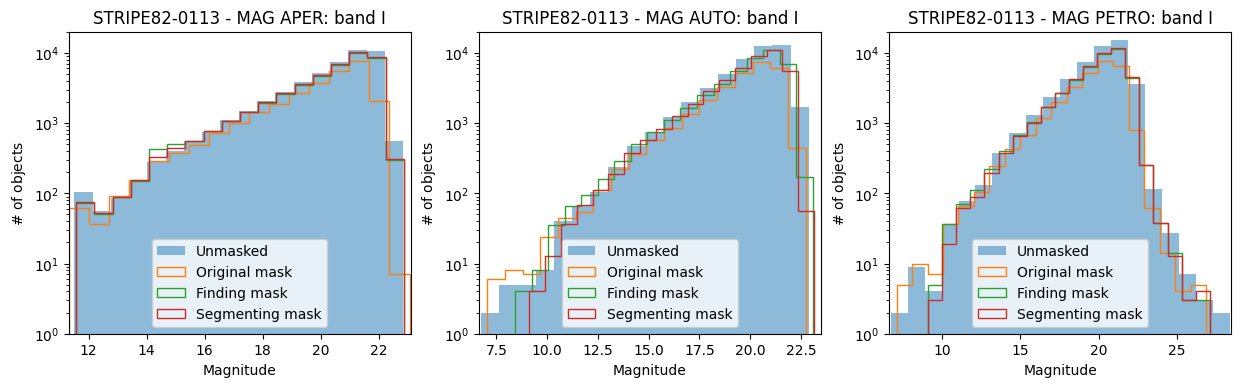

In [13]:
plt.figure(figsize = (15, 4), dpi = 100)

plt.subplot(1,3,1)
plt.title(field+' - MAG APER: band I')
plt.hist(original_I['MAG_APER'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_I['MAG_APER'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_I['MAG_APER'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_I['MAG_APER'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 2*10**4)
plt.xlim(np.min(original_I['MAG_APER']) - 0.2, np.max(original_I['MAG_APER']) - 1.0)

plt.subplot(1,3,2)
plt.title(field+' - MAG AUTO: band I')
plt.hist(original_I['MAG_AUTO'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_I['MAG_AUTO'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_I['MAG_AUTO'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_I['MAG_AUTO'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 2*10**4)
plt.xlim(np.min(original_I['MAG_AUTO']) - 0.1, np.max(original_I['MAG_AUTO']) - 1.2)

plt.subplot(1,3,3)
plt.title(field+' - MAG PETRO: band I')
plt.hist(original_I['MAG_PETRO'], bins = 20, alpha = 0.5, label = 'Unmasked')
plt.hist(omask_I['MAG_PETRO'], bins = 20, histtype='step', label = 'Original mask')
plt.hist(fmask_I['MAG_PETRO'], bins = 20, histtype='step', label = 'Finding mask')
plt.hist(smask_I['MAG_PETRO'], bins = 20, histtype='step', label = 'Segmenting mask')
plt.yscale('log')
plt.legend(loc = 'lower center')
plt.ylabel('$\#$ of objects')
plt.xlabel('Magnitude')
plt.ylim(10**0, 2*10**4)
plt.xlim(np.min(original_I['MAG_PETRO']) - 0.1, np.max(original_I['MAG_PETRO']) + 0.1)

plt.savefig('results/'+field+'/'+field+'-magnitudes-band_I.png', bbox_inches='tight')